<a href="https://colab.research.google.com/github/zakariahachadi123/PFE-Master-ID/blob/main/HeartDiseaseDetectionDLMLCombinaison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [3]:
hd=pd.read_csv('heart.csv')
hd.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
96,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
97,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
98,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


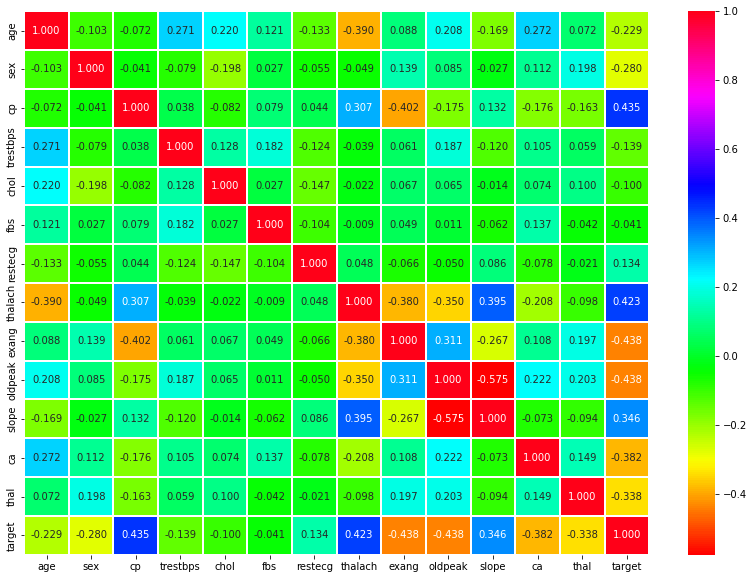

In [4]:
plt.figure(figsize=(14,10))
sns.heatmap(hd.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

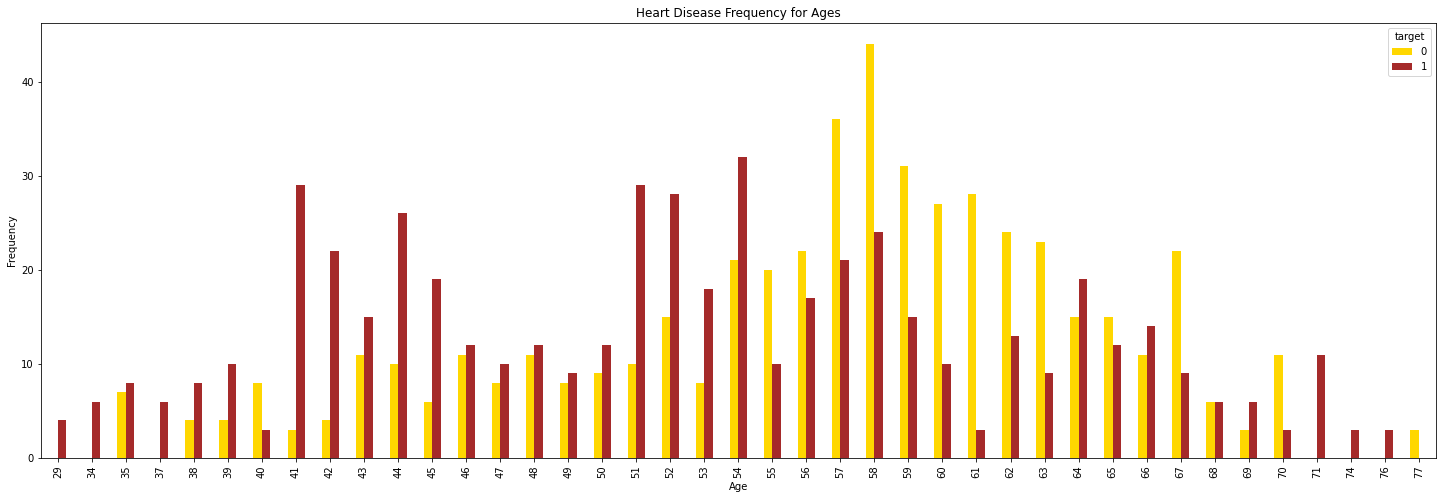

In [5]:
pd.crosstab(hd.age,hd.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

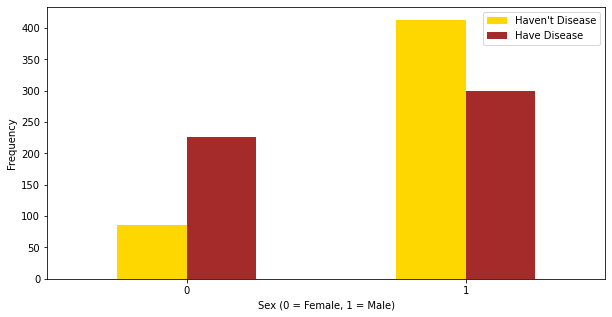

In [6]:
pd.crosstab(hd.sex,hd.target).plot(kind="bar",figsize=(10,5),color=['gold','brown'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

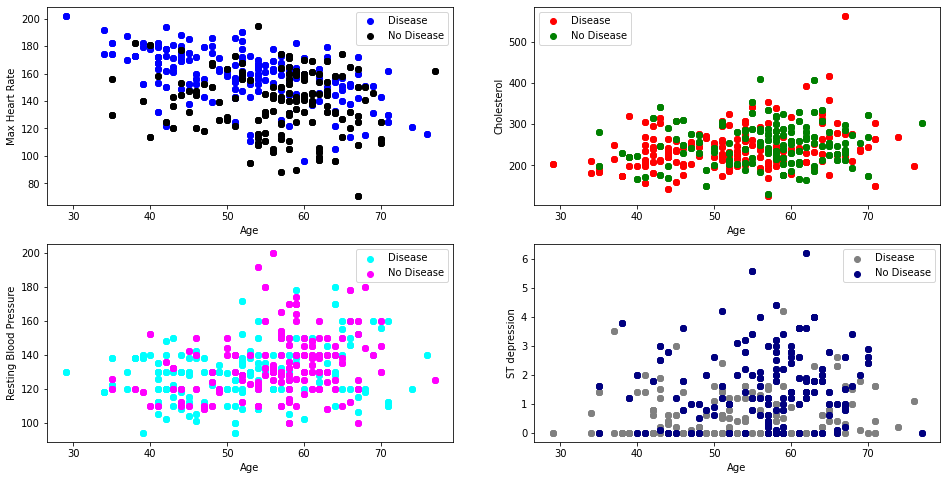

In [7]:
#Effet des paramètres sur les maladies cardiaques en fonction de l'âge
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=hd.age[hd.target==1],y=hd.thalach[hd.target==1],c='blue')
plt.scatter(x=hd.age[hd.target==0],y=hd.thalach[hd.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=hd.age[hd.target==1],y=hd.chol[hd.target==1],c='red')
plt.scatter(x=hd.age[hd.target==0],y=hd.chol[hd.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=hd.age[hd.target==1],y=hd.trestbps[hd.target==1],c='cyan')
plt.scatter(x=hd.age[hd.target==0],y=hd.trestbps[hd.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=hd.age[hd.target==1],y=hd.oldpeak[hd.target==1],c='grey')
plt.scatter(x=hd.age[hd.target==0],y=hd.oldpeak[hd.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

In [8]:
#Création de variables factices
chest_pain=pd.get_dummies(hd['cp'],prefix='cp',drop_first=True)
hd=pd.concat([hd,chest_pain],axis=1)
hd.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(hd['slope'],prefix='slope')
th=pd.get_dummies(hd['thal'],prefix='thal')
rest_ecg=pd.get_dummies(hd['restecg'],prefix='restecg')
frames=[hd,sp,th,rest_ecg]
hd=pd.concat(frames,axis=1)
hd.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [9]:
hd.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,1,0,0,0,1,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,...,1,0,0,0,0,0,1,0,1,0
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,0,1,0,0,1,0


In [108]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import time

In [109]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hd.drop('target', axis=1), hd['target'], test_size=0.2, random_state=42)

In [110]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
# Reshape the data to match the input shape of the CNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [129]:
# Define the model
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [130]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [131]:
# Set up early stopping
early_stop = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

In [132]:
# Train the model and time it
start_time = time.time()
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[early_stop])
end_time = time.time()
elapsed_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(elapsed_time))

Epoch 1/30
21/21 [==============================] - 2s 25ms/step - loss: 0.5303 - accuracy: 0.7820 - val_loss: 0.4391 - val_accuracy: 0.8171
Epoch 2/30
21/21 [==============================] - 0s 8ms/step - loss: 0.3469 - accuracy: 0.8598 - val_loss: 0.4198 - val_accuracy: 0.8537
Epoch 3/30
21/21 [==============================] - 0s 8ms/step - loss: 0.3158 - accuracy: 0.8704 - val_loss: 0.4241 - val_accuracy: 0.8354
Epoch 4/30
21/21 [==============================] - 0s 8ms/step - loss: 0.3032 - accuracy: 0.8841 - val_loss: 0.4393 - val_accuracy: 0.8049
Epoch 5/30
21/21 [==============================] - 0s 8ms/step - loss: 0.2844 - accuracy: 0.8857 - val_loss: 0.4197 - val_accuracy: 0.8232
Epoch 6/30
21/21 [==============================] - 0s 9ms/step - loss: 0.2759 - accuracy: 0.9024 - val_loss: 0.4652 - val_accuracy: 0.7988
Epoch 7/30
21/21 [==============================] - 0s 8ms/step - loss: 0.2747 - accuracy: 0.8735 - val_loss: 0.4448 - val_accuracy: 0.8049
Epoch 8/30
21/21 [=

In [133]:
# Predict the test set and calculate accuracy, recall, and F1-score
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       102
           1       0.90      0.93      0.91       103

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [134]:
# Extract features from CNN model
features_train = model.predict(X_train)
features_test = model.predict(X_test)


7/7 [==============================] - 0s 3ms/step


In [135]:
# Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [136]:
# Train Random Forest model on CNN features
rf_model.fit(features_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [137]:
# Predict using Random Forest model
y_pred = rf_model.predict(features_test)


In [138]:
# Evaluate performance of pipeline
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9707317073170731


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Build linear regression model
lr_model = LinearRegression()

# Train linear regression model on CNN features
lr_model.fit(features_train, y_train)

# Predict using linear regression model
y_pred = lr_model.predict(features_test)

# Evaluate performance of pipeline
# Evaluate performance of pipeline
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)
# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

R2 score: 0.7334122761788577


In [140]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm_classifier = svm.SVC()

# Train the classifier on the training data
svm_classifier.fit(features_train,y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(features_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9121951219512195
